<a href="https://colab.research.google.com/github/mattoriq/Tugas_CNN_ML/blob/main/Tugas_CNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# melakukan import library yang diperlukan

import cv2
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# menghubungkan code dengan google drive. membutuhkan ijin untuk akses drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SIZE = (320, 240)

In [ ]:
daisy_path = '/content/drive/My Drive/daisy_100/'
dandelion_path = '/content/drive/My Drive/dandelion_100/'
sunflower_path = '/content/drive/My Drive/sunflower_100/'

flower_data = []
flower_class = []

for file in os.listdir(daisy_path):
  if file.endswith("jpg"):
    img = cv2.imread(daisy_path + file)
    img = cv2.resize(img, SIZE, cv2.INTER_AREA)
    flower_data.append(img)
    flower_class.append(0)

for file in os.listdir(dandelion_path):
  if file.endswith("jpg"):
    img = cv2.imread(dandelion_path + file)
    img = cv2.resize(img, SIZE, cv2.INTER_AREA)
    flower_data.append(img)
    flower_class.append(1)

for file in os.listdir(sunflower_path):
  if file.endswith("jpg"):
    img = cv2.imread(sunflower_path + file)
    img = cv2.resize(img, SIZE, cv2.INTER_AREA)
    flower_data.append(img)
    flower_class.append(2)

# for data in flower_data:
#   plt.plot(data)
# plt.show()

In [ ]:
#memecah data menjadi fungsi training (80% data) dan testing (20% data)
from sklearn.model_selection import train_test_split
flower_data_train, flower_data_test, flower_class_train, flower_class_test = train_test_split(flower_data,flower_class, test_size=0.2)

#menormalisasi data
flower_data_train=np.array(flower_data_train)/255
flower_data_test=np.array(flower_data_test)/255

#mengepaskan ukuran array
from sklearn.preprocessing import LabelEncoder
flower_class_train = LabelEncoder().fit_transform(flower_class_train)
flower_class_test = LabelEncoder().fit_transform(flower_class_test)

#mengubah data menjadi format one hot
from tensorflow.keras.utils import to_categorical
flower_class_train_one = to_categorical(flower_class_train)
flower_class_test_one = to_categorical(flower_class_test)

In [ ]:
print(flower_class_train_one)

In [ ]:
#Array nama bunga 
flower = ["Daisy", "Dandelion", "Sunflower"]

In [ ]:
#menampilkan contoh bunga
def plot(X, y, i):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[i])
  plt.xlabel(flowers[y[i]])

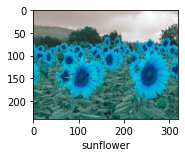

In [ ]:
plot(flower_data_train, flower_class_train, 0)

In [ ]:
#membuat model CNN
model_cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(320, 240, 3)),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(3, activation='softmax')
                         ])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#menentukan banyak epoch dan learning rate 0.1
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
#training data
history = model_cnn.fit(flower_data_train, flower_class_train, epochs = epochs, validation_data = (flower_data_test,flower_class_test),
                              verbose = 1, steps_per_epoch=flower_data_train.shape[0])

Epoch 1/50
240/240 [==============================] - 37s 155ms/step - loss: 1.2467e-07 - accuracy: 1.0000 - val_loss: 5.8916 - val_accuracy: 0.4667
Epoch 2/50
240/240 [==============================] - 37s 155ms/step - loss: 1.1027e-07 - accuracy: 1.0000 - val_loss: 5.8555 - val_accuracy: 0.4667
Epoch 3/50
240/240 [==============================] - 37s 153ms/step - loss: 9.5367e-08 - accuracy: 1.0000 - val_loss: 5.9092 - val_accuracy: 0.4667
Epoch 4/50
240/240 [==============================] - 37s 153ms/step - loss: 8.5930e-08 - accuracy: 1.0000 - val_loss: 5.8475 - val_accuracy: 0.4667
Epoch 5/50
240/240 [==============================] - 36s 150ms/step - loss: 7.7983e-08 - accuracy: 1.0000 - val_loss: 5.9258 - val_accuracy: 0.4667
Epoch 6/50
240/240 [==============================] - 37s 152ms/step - loss: 7.1029e-08 - accuracy: 1.0000 - val_loss: 5.9292 - val_accuracy: 0.4667
Epoch 7/50
240/240 [==============================] - 37s 154ms/step - loss: 6.1095e-08 - accuracy: 1.0000

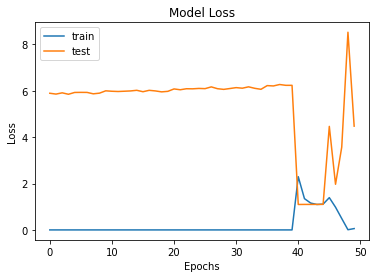

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

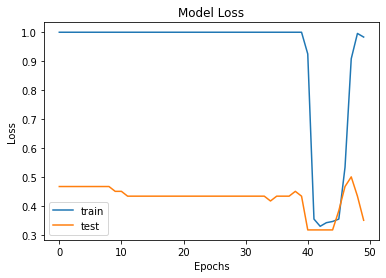

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()